In [1]:
!python --version

Python 3.7.16


In [1]:
import helpers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
envs = helpers.create_envs(yamls_filename='identical_region_yamls')
agents_no_negotiation = helpers.create_agents(envs[0])
agents_negotiation = helpers.create_agents(envs[0])
mean_reward = helpers.get_mean_reward(envs[0])

100%|█████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 28.03it/s]


In [3]:
def plot_rewards(rewards, w = 1000, pos = False):
    
    rewards = np.array(rewards)
    if pos:
        rewards = rewards[rewards > 0]
    plt.scatter(range(len(rewards)), rewards, alpha = .3, s = .2)
    plt.plot(np.convolve(rewards, np.ones(w) / w, mode = 'valid'), color = 'orange', linewidth = 2)
    plt.show()

In [4]:
all_action_rewards = helpers.train(agents_no_negotiation, envs, epochs = 30, communication_on=False)

100%|███████████████████████████████████████████████████████████████████████████| 30/30 [01:10<00:00,  2.35s/it]


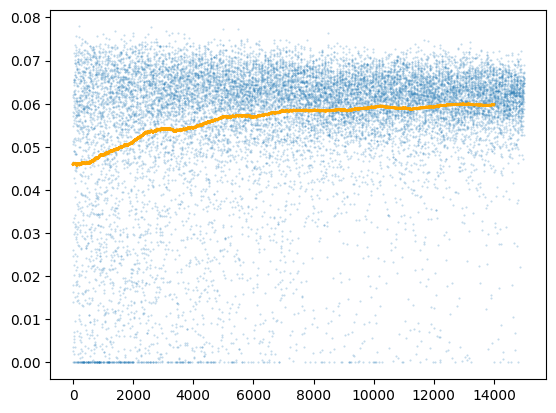

In [5]:
plot_rewards(all_action_rewards[1], w = 1000)

In [6]:
a = helpers.eval_agents(agents_no_negotiation, envs[0], communication_on = False)

In [10]:
b = np.stack(list(map(lambda x: x['global_temperature']['value'], a)))
b.shape

(10, 21, 2)

In [11]:
b.mean(0)

array([[0.85      , 0.0068    ],
       [0.9886611 , 0.02788   ],
       [1.1079748 , 0.05189953],
       [1.2125177 , 0.07830141],
       [1.3053648 , 0.10665681],
       [1.3889463 , 0.13662452],
       [1.4651535 , 0.16793256],
       [1.5352229 , 0.20036308],
       [1.6002887 , 0.23373458],
       [1.6614212 , 0.26789844],
       [1.719086  , 0.30273652],
       [1.7738224 , 0.3381452 ],
       [1.8260326 , 0.37403718],
       [1.8761895 , 0.41033706],
       [1.9245803 , 0.44698334],
       [1.9710817 , 0.48392326],
       [2.016172  , 0.52110225],
       [2.0601585 , 0.558479  ],
       [2.1033206 , 0.596021  ],
       [2.145747  , 0.6337035 ],
       [2.1871862 , 0.6715046 ]], dtype=float32)

In [39]:
state = env.reset()
for t in range(env.episode_length):
    actions = {agent.id: agent.eval_act(state[agent.id]) for agent in agents_no_negotiation}
    #print(actions[0])
    state, _, _, _ = env.step(actions)
a.append(copy.deepcopy(env.global_state))

In [40]:
a[0]['global_temperature']['value'], a[1]['global_temperature']['value']

({'value': array([[0.85      , 0.0068    ],
         [0.9886611 , 0.02788   ],
         [1.1079898 , 0.05189953],
         [1.2128727 , 0.07830178],
         [1.307074  , 0.10666605],
         [1.3919699 , 0.13667625],
         [1.4696336 , 0.16805859],
         [1.5413896 , 0.20059796],
         [1.6085125 , 0.23411775],
         [1.6712782 , 0.26847762],
         [1.7307193 , 0.30354762],
         [1.7871939 , 0.3392269 ],
         [1.8413649 , 0.37542608],
         [1.8933368 , 0.41207457],
         [1.9439713 , 0.44910613],
         [1.9920106 , 0.48647776],
         [2.0387003 , 0.5241161 ],
         [2.0837996 , 0.5619807 ],
         [2.12816   , 0.6000262 ],
         [2.1717973 , 0.63822955],
         [2.2143137 , 0.67656875]], dtype=float32),
  'norm': 10.0},
 {'value': array([[0.85      , 0.0068    ],
         [0.9886611 , 0.02788   ],
         [1.1082394 , 0.05189953],
         [1.2125891 , 0.07830802],
         [1.3049438 , 0.10666505],
         [1.3882085 , 0.13662203],
   

In [17]:
state = env.reset()
for t in range(env.episode_length):
    actions = {agent.id: agent.eval_act(state[agent.id]) for agent in agents_no_negotiation}
    print(actions[0])
    state, _, _, _ = env.step(actions)
print(env.global_state['global_temperature'])

[2 2 1 5 9 8 7 4 7 5 1]
[3 7 1 1 8 6 5 7 5 3 6]
[1 7 2 2 6 0 8 4 5 8 1]
[6 6 1 1 9 5 1 4 8 2 4]
[1 9 1 0 0 8 4 7 6 8 0]
[4 0 2 8 5 8 6 7 4 8 0]
[2 3 1 9 9 9 9 1 4 9 5]
[0 2 5 0 9 7 0 3 4 6 0]
[2 9 1 8 3 5 2 0 8 5 5]
[0 2 1 9 9 2 8 4 9 3 1]
[1 8 5 6 6 0 7 5 9 5 4]
[1 3 2 5 7 8 7 6 8 2 2]
[0 5 0 6 6 8 4 3 3 3 4]
[3 8 0 1 5 2 6 5 7 4 4]
[1 7 2 5 5 7 8 2 3 2 0]
[2 3 2 7 4 0 0 6 1 0 4]
[2 3 2 6 7 8 3 1 3 8 0]
[3 0 1 0 7 5 2 0 8 8 5]
[0 7 3 5 4 8 8 0 7 2 4]
[0 3 0 8 7 8 6 1 4 2 4]
{'value': array([[0.85      , 0.0068    ],
       [0.9886611 , 0.02788   ],
       [1.1081396 , 0.05189953],
       [1.2127835 , 0.07830553],
       [1.3055041 , 0.10666747],
       [1.3893732 , 0.13663839],
       [1.4656657 , 0.16795675],
       [1.5358325 , 0.20039947],
       [1.6018578 , 0.2337853 ],
       [1.6640809 , 0.2679871 ],
       [1.7222686 , 0.30288944],
       [1.7777942 , 0.33837393],
       [1.8304384 , 0.37435943],
       [1.8816335 , 0.41076142],
       [1.9310664 , 0.44753322],
       [1.97901

In [8]:
o = helpers.train(agents_negotiation, envs, mean_rewards=mean_reward)

100%|█████████████████████████████████████████████████████████████████████████| 100/100 [08:54<00:00,  5.34s/it]


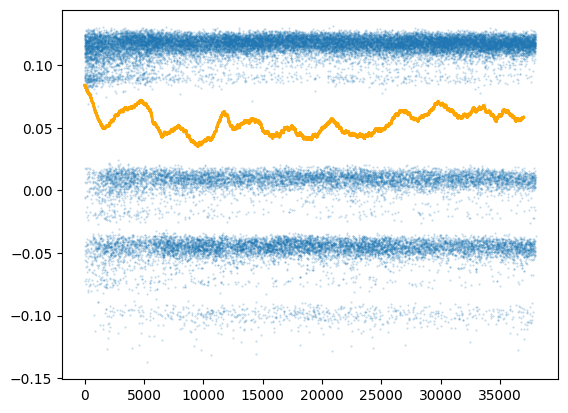

In [12]:
plot_rewards(o['promise'][0])